In [19]:
import numpy as np
import pandas as pd

df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [20]:
df.drop(['RowNumber','CustomerId','Surname'],axis='columns',inplace=True)
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [21]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [22]:
df[df.Geography=='France']

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
...,...,...,...,...,...,...,...,...,...,...,...
9994,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [23]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [24]:
import matplotlib.pyplot as plt

In [25]:
def plot_country(df,country):
    plt.hist([df[(df.Geography==country)&(df.Exited==1)].Tenure,df[(df.Geography==country)&(df.Exited==0)].Tenure], rwidth=0.95, color=['red','green',],label=['left','stay'])
    plt.legend()

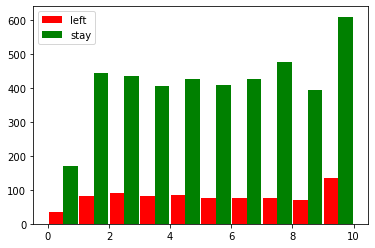

In [26]:
plot_country(df,'France')

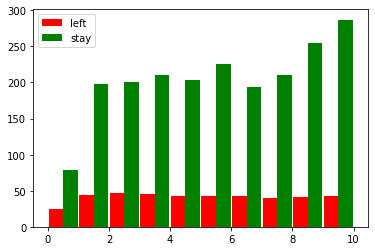

In [27]:
plot_country(df,'Spain')

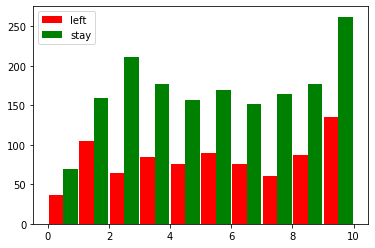

In [28]:
plot_country(df,'Germany')

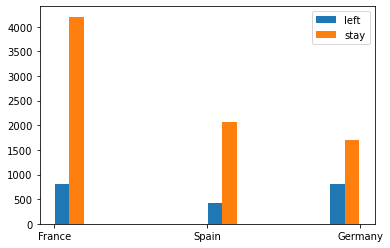

In [29]:
plt.hist([df[df.Exited==1].Geography,df[df.Exited==0].Geography],label = ['left','stay'],rwidth=0.95)
plt.legend()

In [30]:
df.groupby('Exited').describe().Age

,count,mean,std,min,25%,50%,75%,max
Exited,,,,,,,,
0,7963.0,37.408389,10.125363,18.0,31.0,36.0,41.0,92.0
1,2037.0,44.837997,9.761562,18.0,38.0,45.0,51.0,84.0


In [31]:
df.groupby('Exited').describe().Balance

,count,mean,std,min,25%,50%,75%,max
Exited,,,,,,,,
0,7963.0,72745.296779,62848.040701,0.0,0.00,92072.68,126410.28,221532.80
1,2037.0,91108.539337,58360.794816,0.0,38340.02,109349.29,131433.33,250898.09


In [32]:
df1 = pd.get_dummies(data=df, columns=['Geography'])
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [33]:
df1.drop(['Geography_Germany'],axis='columns',inplace=True)

In [34]:
df1.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [35]:
df1.Gender = df1.Gender.apply(lambda x: 0 if 'Female' else 1)

In [36]:
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


In [51]:
X = df1.drop(['Exited'],axis='columns')
y = df1.Exited

In [43]:
len(X.columns)

11

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [55]:
model.score(X_test,y_test)

0.8165

In [45]:
cols_to_scale = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [50]:
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Spain
0,0.538,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0
1,0.516,0,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,1
2,0.304,0,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0
3,0.698,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0
4,1.000,0,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,1


In [57]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(11,), activation='relu'),
#     keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 1ms/step - loss: 0.5112 - accuracy: 0.8044
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4634 - accuracy: 0.8033
Epoch 3/100
250/250 [==============================] - 0s 970us/step - loss: 0.4572 - accuracy: 0.8062
Epoch 4/100
250/250 [==============================] - 0s 962us/step - loss: 0.4548 - accuracy: 0.8061
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4358 - accuracy: 0.8179
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4301 - accuracy: 0.8207
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4257 - accuracy: 0.8176
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4224 - accuracy: 0.8186
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4197 - accuracy: 0.8231
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3995 - ac

250/250 [==============================] - 0s 1ms/step - loss: 0.3423 - accuracy: 0.8594
Epoch 82/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3341 - accuracy: 0.8600
Epoch 83/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3440 - accuracy: 0.8597
Epoch 84/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3275 - accuracy: 0.8663
Epoch 85/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3478 - accuracy: 0.8612
Epoch 86/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3392 - accuracy: 0.8632
Epoch 87/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3246 - accuracy: 0.8649
Epoch 88/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3291 - accuracy: 0.8681
Epoch 89/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3419 - accuracy: 0.8563
Epoch 90/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3397 - accuracy: 

In [58]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.3600 - accuracy: 0.8545


[0.36000096797943115, 0.8544999957084656]